In [573]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, GridSearchCV

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from IPython.display import Image

In [574]:
TRAIN_DATASET_PATH = './data/project_task/train.csv' # y_train, y_valid
TEST_DATASET_PATH = './data/project_task/test.csv'

train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

## Анализ данных и предобработка

In [575]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [576]:
train_df[['DistrictId', 'Price']].groupby(['DistrictId'], as_index=False).mean().sort_values(by='Price', ascending=False)

,DistrictId,Price
195,195,482791.138606
190,190,471966.746348
181,181,450654.779595
182,182,441284.916612
197,199,432546.129741
...,...,...
58,58,162287.311374
27,27,156046.416277
204,209,140048.802277
158,158,129080.871245


In [577]:
train_df[['Rooms', 'Price']].groupby(['Rooms'], as_index=False).mean().sort_values(by='Price', ascending=False)

,Rooms,Price
5,5.0,410431.605679
4,4.0,383251.100956
3,3.0,289337.962452
7,10.0,244797.297328
6,6.0,229661.964416
2,2.0,215256.306416
0,0.0,200435.886261
1,1.0,159850.800729
8,19.0,78364.616704


In [578]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
6.0        1
19.0       1
Name: Rooms, dtype: int64

In [579]:
train_df = train_df.drop(train_df[train_df['Rooms'] == 19.0].index)
train_df = train_df.drop(train_df[train_df['Rooms'] == 0.0].index)

In [580]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
10.0       2
6.0        1
Name: Rooms, dtype: int64

In [581]:
train_df['Square'].describe()

count    9991.000000
mean       56.296946
std        20.981136
min         1.136859
25%        41.774312
50%        52.513850
75%        65.891407
max       641.065193
Name: Square, dtype: float64

In [582]:
train_df.loc[train_df['Square'] > 200, ['Square', 'Price']].value_counts()

Square      Price        
200.334539  528560.506016    1
275.645284  455264.882666    1
409.425181  90470.430830     1
604.705972  187717.242538    1
641.065193  133529.681562    1
dtype: int64

In [583]:
train_df.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [584]:
train_df.groupby(['Shops_2']).agg({'Price' : ['mean', 'max']})

Price               
                  mean            max
Shops_2                              
A        192339.700513  502523.573863
B        216127.696853  633233.466570

In [585]:
print(train_df.isna().sum(),"\n", "-" * 20, "\n", test_df.isna().sum())

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2110
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4791
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64 
 -------------------- 
 Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64


In [586]:
train_df['LifeSquare'].fillna(train_df['Square'] / 1.6228, inplace=True)
test_df['LifeSquare'].fillna(test_df['Square'] / 1.6228, inplace=True)

In [587]:
print(train_df.isna().sum(),"\n", "-" * 20, "\n", test_df.isna().sum())

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4791
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64 
 -------------------- 
 Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64


In [588]:
train_median = train_df['Healthcare_1'].median()
test_median = test_df['Healthcare_1'].median()
train_df['Healthcare_1'].fillna(train_median, inplace=True)
test_df['Healthcare_1'].fillna(test_median, inplace=True)

In [589]:
print(train_df.isna().sum(),"\n", "-" * 20, "\n", test_df.isna().sum())

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64 
 -------------------- 
 Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64


In [590]:
train_df = train_df.round().astype(int, errors='ignore')
test_df = test_df.round().astype(int, errors='ignore')

In [591]:
print(train_df.describe(include=['O']), "\n", "-" * 50, "\n", test_df.describe(include=['O']))

       Ecology_2 Ecology_3 Shops_2
count       9991      9991    9991
unique         2         2       2
top            B         B       B
freq        9894      9716    9166 
 -------------------------------------------------- 
        Ecology_2 Ecology_3 Shops_2
count       5000      5000    5000
unique         2         2       2
top            B         B       B
freq        4952      4851    4588


In [592]:
object_mapping = {"A": 0, "B": 1}
columns = ["Ecology_2", "Ecology_3", "Shops_2"]
for col in columns:
  train_df[col] = train_df[col].map(object_mapping)
for col in columns:
  test_df[col] = test_df[col].map(object_mapping)

In [593]:
train_df.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3,115,71,10,4,10,2014,0,1,1,11,3097,0,900,0,0,1,305019
1,3013,22,1,40,23,8,7,8,1966,0,1,1,30,6207,1,1183,1,0,1,177735
2,8215,1,3,78,48,10,2,17,1988,0,1,1,33,5261,0,240,3,1,1,282079
3,2352,1,1,40,25,1,10,22,1977,0,1,1,1,264,0,900,0,1,1,168106
4,13866,94,2,64,39,9,16,16,1972,0,1,1,33,8667,2,900,0,6,1,343995


In [594]:
train_df['HouseYear'].value_counts()

1977        2648
2017         308
2016         304
2015         298
2014         209
            ... 
1928           1
1947           1
1914           1
4968           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

### Обработка выбросов

In [595]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9.991000e+03,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000
mean,8385.613252,50.420378,1.890301,56.290962,37.174957,6.277350,8.527275,12.615354,3.991965e+03,0.003904,0.990291,0.972475,24.697328,5354.405765,8.046041,1026.480432,1.320288,4.233810,0.917426,214163.421680
std,4859.195460,43.596811,0.820518,20.985464,76.872985,28.573283,5.240639,6.772691,2.005905e+05,0.062359,0.098058,0.163615,17.532651,4007.163948,23.841500,746.974096,1.493767,4.807087,0.275251,92885.378813
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59175.000000
25%,4173.000000,20.000000,1.000000,42.000000,24.000000,1.000000,4.000000,9.000000,1.974000e+03,0.000000,1.000000,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153889.500000
50%,8396.000000,36.000000,2.000000,53.000000,33.000000,6.000000,7.000000,13.000000,1.977000e+03,0.000000,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192262.000000
75%,12594.500000,75.000000,2.000000,66.000000,45.000000,9.000000,12.000000,17.000000,2.001000e+03,0.000000,1.000000,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249148.500000
max,16798.000000,209.000000,10.000000,641.000000,7481.000000,2014.000000,42.000000,117.000000,2.005201e+07,1.000000,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.000000


In [596]:
train_df[(train_df['LifeSquare'] > 150)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
357,14990,23,2,48,264,5,6,5,1972,0,1,1,6,1437,3,900,0,2,1,141780
726,28,9,2,605,373,1,17,18,1977,0,1,1,25,5648,1,30,2,4,1,187717
730,14181,62,3,157,154,1,1,3,2005,0,1,1,2,629,1,900,0,0,0,502524
1776,16568,27,4,200,202,25,1,2,2013,0,1,1,53,14892,4,900,1,4,1,528561
1906,5548,86,5,276,234,26,12,37,2011,0,1,0,31,7010,5,4508,3,7,1,455265
3204,5621,23,3,163,162,12,5,3,1977,0,1,1,2,475,0,900,0,0,1,207008
5183,15886,85,3,78,461,10,12,16,1998,0,1,1,52,11217,1,2300,1,7,1,394253
5283,11055,151,1,175,175,15,10,12,1958,0,1,1,16,3893,27,900,3,10,1,232766
5712,8961,27,1,33,164,6,3,5,1965,0,1,1,9,1892,0,900,0,1,1,104891
6030,15362,23,1,163,161,1,4,3,1977,0,1,1,2,475,0,900,0,0,1,228573


In [597]:
train_df.loc[train_df['LifeSquare'] > train_df['Square']].value_counts()

Id     DistrictId  Rooms  Square  LifeSquare  KitchenSquare  Floor  HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2  Price 
10     6           3      76      78          1              11     17          2014       0          1          1          5         1564      0         540           0            0        1        218501    1
10993  23          1      31      32          10             5      17          2016       0          1          1          0         168       0         900           0            0        1        66631     1
11555  59          2      72      75          0              11     9           2015       0          1          1          37        7687      11        176           5            5        1        364571    1
11554  27          3      45      46          1              14     25          2015       0          1          1          2         629       1         900    

In [598]:
train_df.loc[train_df['Floor'] > train_df['HouseFloor']].value_counts()

Id     DistrictId  Rooms  Square  LifeSquare  KitchenSquare  Floor  HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2  Price 
33     26          2      47      30          5              7      5           1967       0          1          1          36        6714      2         2672          0            2        1        181631    1
11090  1           1      41      41          0              12     0           1977       0          1          1          1         264       0         900           0            1        1        127437    1
11326  27          1      44      27          1              11     9           1977       0          1          1          2         629       1         900           0            0        0        147868    1
11294  27          2      61      57          1              16     1           2016       0          1          1          2         629       1         900    

In [599]:
train_df['LifeSquare'].loc[train_df['LifeSquare'] > train_df['Square']] = (train_df['Square'] / 1.6228).round().astype(int)
test_df['LifeSquare'].loc[test_df['LifeSquare'] > test_df['Square']] = (test_df['Square'] / 1.6228).round().astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [600]:
train_df['Floor'].loc[train_df['Floor'] > train_df['HouseFloor']] = (train_df['HouseFloor'] / 2).round().astype(int)
test_df['Floor'].loc[test_df['Floor'] > test_df['HouseFloor']] = (test_df['HouseFloor'] / 2).round().astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [601]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9.991000e+03,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000
mean,8385.613252,50.420378,1.890301,56.290962,35.374837,6.277350,7.090782,12.615354,3.991965e+03,0.003904,0.990291,0.972475,24.697328,5354.405765,8.046041,1026.480432,1.320288,4.233810,0.917426,214163.421680
std,4859.195460,43.596811,0.820518,20.985464,17.108923,28.573283,5.123584,6.772691,2.005905e+05,0.062359,0.098058,0.163615,17.532651,4007.163948,23.841500,746.974096,1.493767,4.807087,0.275251,92885.378813
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59175.000000
25%,4173.000000,20.000000,1.000000,42.000000,24.000000,1.000000,3.000000,9.000000,1.974000e+03,0.000000,1.000000,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153889.500000
50%,8396.000000,36.000000,2.000000,53.000000,33.000000,6.000000,6.000000,13.000000,1.977000e+03,0.000000,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192262.000000
75%,12594.500000,75.000000,2.000000,66.000000,44.000000,9.000000,10.000000,17.000000,2.001000e+03,0.000000,1.000000,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249148.500000
max,16798.000000,209.000000,10.000000,641.000000,638.000000,2014.000000,42.000000,117.000000,2.005201e+07,1.000000,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.000000


In [602]:
train_df.loc[train_df['LifeSquare'] > 150].value_counts()

Id     DistrictId  Rooms  Square  LifeSquare  KitchenSquare  Floor  HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2  Price 
28     9           2      605     373         1              17     18          1977       0          1          1          25        5648      1         30            2            4        1        187717    1
2307   102         1      409     252         10             4      4           2016       0          1          1          26        3889      6         705           3            6        1        90470     1
5548   86          5      276     234         26             12     37          2011       0          1          0          31        7010      5         4508          3            7        1        455265    1
5621   23          3      163     162         12             2      3           1977       0          1          1          2         475       0         900    

In [603]:
train_df.drop(train_df[train_df['LifeSquare'] > 150].index, inplace=True)

In [604]:
train_df.loc[train_df['KitchenSquare'] > 70].value_counts()

Id     DistrictId  Rooms  Square  LifeSquare  KitchenSquare  Floor  HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2  Price 
2737   27          3      123     76          123            5      10          2015       0          1          1          2         469       0         900           0            0        1        234195    1
4966   96          3      78      47          75             9      12          1977       0          1          1          53        14892     4         900           1            4        1        290354    1
6569   27          1      38      19          84             4      17          2018       0          1          1          4         915       0         900           0            0        1        99080     1
7441   62          3      115     113         112            3      3           2015       0          1          1          2         629       1         900    

In [605]:
train_df['KitchenSquare'].loc[train_df['KitchenSquare'] > train_df['Square']] = (train_df['Square'] / 9).round().astype(int)
test_df['KitchenSquare'].loc[test_df['KitchenSquare'] > test_df['Square']] = (test_df['Square'] / 9).round().astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [606]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9.983000e+03,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.00000,9983.000000
mean,8385.751578,50.412101,1.890013,56.076730,35.187919,5.861665,7.090654,12.615546,3.993567e+03,0.003907,0.990283,0.972553,24.704498,5355.850045,8.034358,1026.312431,1.319944,4.232195,0.91746,214130.911850
std,4858.851897,43.593814,0.819960,18.822227,15.162803,5.066122,5.123314,6.767887,2.006709e+05,0.062384,0.098097,0.163389,17.534905,4007.792556,23.812631,746.382536,1.493796,4.804323,0.27520,92833.930796
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.00000,59175.000000
25%,4173.000000,20.000000,1.000000,42.000000,24.000000,1.000000,3.000000,9.000000,1.974000e+03,0.000000,1.000000,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.00000,153889.500000
50%,8396.000000,36.000000,2.000000,52.000000,33.000000,6.000000,6.000000,13.000000,1.977000e+03,0.000000,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.00000,192248.000000
75%,12594.500000,75.000000,2.000000,66.000000,44.000000,9.000000,10.000000,17.000000,2.001000e+03,0.000000,1.000000,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.00000,249148.500000
max,16798.000000,209.000000,10.000000,200.000000,138.000000,123.000000,42.000000,117.000000,2.005201e+07,1.000000,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.00000,633233.000000


In [607]:
train_df.loc[train_df['Square'] < 10].value_counts()

Id     DistrictId  Rooms  Square  LifeSquare  KitchenSquare  Floor  HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2  Price 
1748   88          2      5       3           1              11     22          1977       0          1          1          43        8429      3         900           3            9        1        412511    1
4504   27          3      4       2           1              8      19          2016       0          1          1          9         1892      0         900           0            1        1        161379    1
6782   45          1      3       2           1              0      1           1977       0          1          1          23        5212      6         900           3            2        1        438005    1
7657   38          1      5       5           1              0      1           1977       0          1          1          15        2787      2         520    

In [608]:
train_df.drop(train_df[train_df['Square'] <= 10].index, inplace=True)

In [609]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9.972000e+03,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000
mean,8384.349178,50.437726,1.890493,56.134376,35.224128,5.867128,7.094364,12.618532,3.995780e+03,0.003911,0.990273,0.972523,24.713799,5357.714501,8.041316,1026.351183,1.320297,4.233053,0.917369,214057.756619
std,4859.466653,43.603556,0.819873,18.752306,15.131855,5.066234,5.123137,6.763694,2.007816e+05,0.062418,0.098151,0.163477,17.533872,4007.514977,23.824739,746.576928,1.493776,4.805310,0.275338,92733.319143
min,0.000000,0.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59175.000000
25%,4169.500000,20.000000,1.000000,42.000000,24.000000,1.000000,3.000000,9.000000,1.974000e+03,0.000000,1.000000,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153891.750000
50%,8394.500000,36.000000,2.000000,53.000000,33.000000,6.000000,6.000000,13.000000,1.977000e+03,0.000000,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192223.000000
75%,12594.250000,75.000000,2.000000,66.000000,44.000000,9.000000,10.000000,17.000000,2.001000e+03,0.000000,1.000000,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249100.750000
max,16798.000000,209.000000,10.000000,200.000000,138.000000,123.000000,42.000000,117.000000,2.005201e+07,1.000000,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.000000


In [610]:
train_df['LifeSquare'].loc[train_df['LifeSquare'] > train_df['Square']] = (train_df['Square'] / 1.6228).round().astype(int)
test_df['LifeSquare'].loc[test_df['LifeSquare'] > test_df['Square']] = (test_df['Square'] / 1.6228).round().astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [611]:
train_df['LifeSquare'].loc[train_df['Square'] > (train_df['LifeSquare'] * 2)] = (train_df['Square'] / 1.6228).round().astype(int)
train_df['KitchenSquare'].loc[train_df['Square'] > (train_df['KitchenSquare'] * 10)] = (train_df['Square'] / 9).round().astype(int)
test_df['LifeSquare'].loc[test_df['Square'] > (test_df['LifeSquare'] * 2)] = (test_df['Square'] / 1.6228).round().astype(int)
test_df['KitchenSquare'].loc[test_df['Square'] > (test_df['KitchenSquare'] * 10)] = (test_df['Square'] / 9).round().astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [612]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9.972000e+03,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000
mean,8384.349178,50.437726,1.890493,56.134376,36.392198,7.819595,7.094364,12.618532,3.995780e+03,0.003911,0.990273,0.972523,24.713799,5357.714501,8.041316,1026.351183,1.320297,4.233053,0.917369,214057.756619
std,4859.466653,43.603556,0.819873,18.752306,14.282524,3.965406,5.123137,6.763694,2.007816e+05,0.062418,0.098151,0.163477,17.533872,4007.514977,23.824739,746.576928,1.493776,4.805310,0.275338,92733.319143
min,0.000000,0.000000,1.000000,14.000000,9.000000,2.000000,0.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59175.000000
25%,4169.500000,20.000000,1.000000,42.000000,26.000000,6.000000,3.000000,9.000000,1.974000e+03,0.000000,1.000000,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153891.750000
50%,8394.500000,36.000000,2.000000,53.000000,33.000000,7.000000,6.000000,13.000000,1.977000e+03,0.000000,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192223.000000
75%,12594.250000,75.000000,2.000000,66.000000,44.000000,9.000000,10.000000,17.000000,2.001000e+03,0.000000,1.000000,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249100.750000
max,16798.000000,209.000000,10.000000,200.000000,138.000000,123.000000,42.000000,117.000000,2.005201e+07,1.000000,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.000000


### Понижение размерности и визуализация

In [613]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    file = reduce_mem_usage(file)
    return file

import_data(train_df)
import_data(test_df)

Memory usage of dataframe is 1.20 MB
Memory usage after optimization is: 0.64 MB
Decreased by 46.6%
Memory usage of dataframe is 0.42 MB
Memory usage after optimization is: 0.13 MB
Decreased by 69.3%


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1,37,19,5,5,9,1970,0,1,1,24,4378,0,1036,1,1,1
1,5925,62,1,42,26,10,7,17,2017,0,1,1,2,629,1,900,0,0,0
2,960,27,2,59,37,9,19,19,1977,0,1,1,9,1892,0,900,0,1,1
3,3848,23,3,50,34,6,2,2,1965,0,1,1,2,475,0,900,0,0,1
4,746,74,1,54,33,6,8,17,1977,0,1,1,35,7715,4,990,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2,43,30,5,2,5,1962,0,1,1,31,6119,4,900,1,2,1
4996,16138,38,3,94,58,10,21,27,2018,0,1,1,15,2787,2,520,0,7,1
4997,3912,101,1,34,19,5,2,5,1966,0,1,1,28,6533,1,1015,2,5,1
4998,5722,10,1,39,21,9,8,14,1970,0,1,1,33,7976,5,900,0,11,1


In [614]:
train_df.dtypes, test_df.dtypes

(Id               int16
 DistrictId       int16
 Rooms             int8
 Square           int16
 LifeSquare       int16
 KitchenSquare     int8
 Floor             int8
 HouseFloor        int8
 HouseYear        int32
 Ecology_1         int8
 Ecology_2         int8
 Ecology_3         int8
 Social_1          int8
 Social_2         int16
 Social_3         int16
 Healthcare_1     int16
 Helthcare_2       int8
 Shops_1           int8
 Shops_2           int8
 Price            int32
 dtype: object,
 Id               int16
 DistrictId       int16
 Rooms             int8
 Square           int16
 LifeSquare       int16
 KitchenSquare     int8
 Floor             int8
 HouseFloor        int8
 HouseYear        int16
 Ecology_1         int8
 Ecology_2         int8
 Ecology_3         int8
 Social_1          int8
 Social_2         int16
 Social_3         int16
 Healthcare_1     int16
 Helthcare_2       int8
 Shops_1           int8
 Shops_2           int8
 dtype: object)

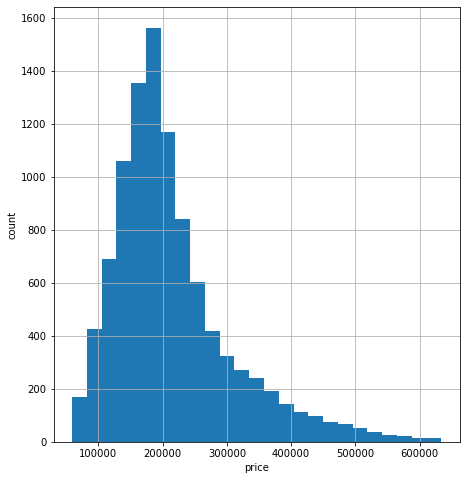

In [615]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
train_df['Price'].hist(density=False, bins=25)
plt.ylabel('count')
plt.xlabel('price')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


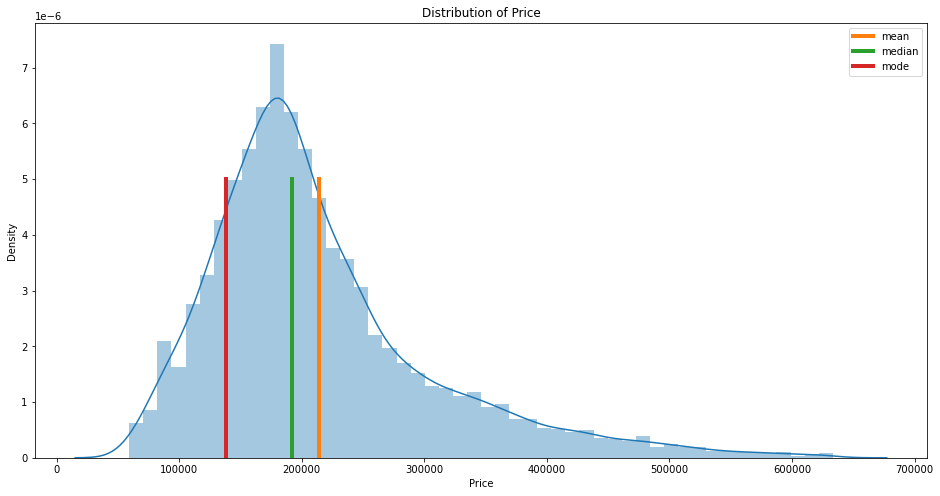

In [616]:
plt.figure(figsize = (16, 8))
target_mean= round(train_df['Price'].mean(), 2)
target_median = train_df['Price'].median()
target_mode = train_df['Price'].mode()[0]

sns.distplot(train_df['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

In [617]:
target_bins = train_df['Price'] // 10000 * 10000

target_adjusted_mode = target_bins.mode()[0]
target_adjusted_mode

180000

In [618]:
target_bins.value_counts().iloc[:10]

180000    738
170000    673
160000    613
190000    596
150000    542
200000    516
140000    495
210000    466
130000    433
220000    372
Name: Price, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


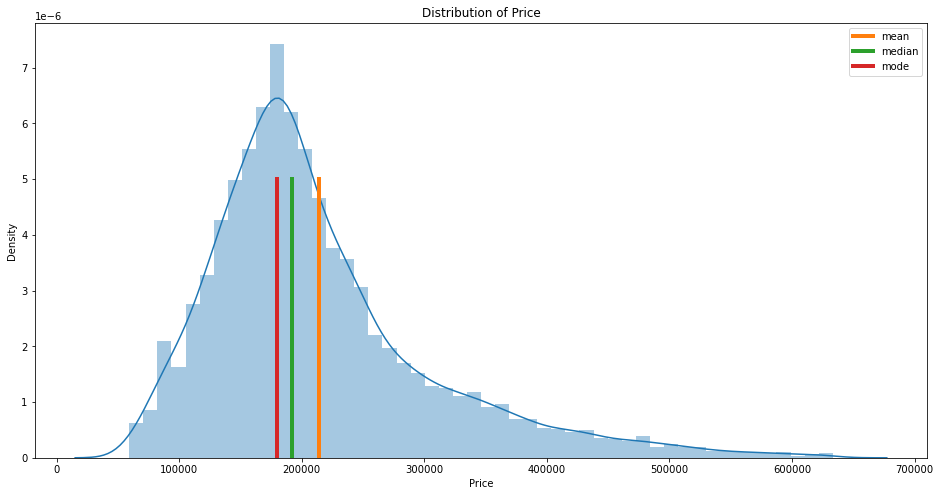

In [619]:
plt.figure(figsize = (16, 8))
target_mean= round(train_df['Price'].mean(), 2)
target_median = train_df['Price'].median()
target_mode = train_df['Price'].mode()[0]

sns.distplot(train_df['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linewidth=4)
plt.plot([target_adjusted_mode] * 10, y, label='mode', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

In [620]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3,115,71,13,4,10,2014,0,1,1,11,3097,0,900,0,0,1,305019
1,3013,22,1,40,23,8,7,8,1966,0,1,1,30,6207,1,1183,1,0,1,177735
2,8215,1,3,78,48,10,2,17,1988,0,1,1,33,5261,0,240,3,1,1,282079
3,2352,1,1,40,25,4,10,22,1977,0,1,1,1,264,0,900,0,1,1,168106
4,13866,94,2,64,39,9,16,16,1972,0,1,1,33,8667,2,900,0,6,1,343995


<AxesSubplot:>

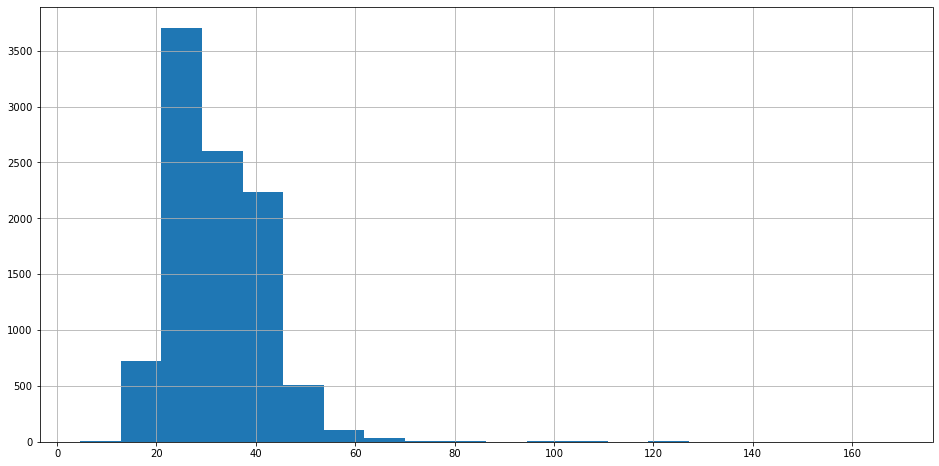

In [621]:
square_per_room = train_df['Square'] / train_df['Rooms']
square_per_room.hist(figsize=(16,8), bins=20, grid=True)

### Дополнительная обработка данных и Feature Engineering

In [622]:
train_df.isnull().value_counts()
train_df.loc[train_df['LifeSquare'] < 10, 'Rooms'] = 1
train_df['HouseFloor'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  36,  37,  38,  39,  40,  44,
        45,  47,  48,  99, 117], dtype=int8)

In [623]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = int(train_df['HouseFloor'].median())
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = int(test_df['HouseFloor'].median())

In [624]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9.972000e+03,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000
mean,8384.349178,50.437726,1.890293,56.134376,36.392198,7.819595,7.094364,12.963999,3.995780e+03,0.003911,0.990273,0.972523,24.713799,5357.714501,8.041316,1026.351183,1.320297,4.233053,0.917369,214057.756619
std,4859.466653,43.603556,0.819846,18.752306,14.282524,3.965406,5.123137,6.434304,2.007816e+05,0.062418,0.098151,0.163477,17.533872,4007.514977,23.824739,746.576928,1.493776,4.805310,0.275338,92733.319143
min,0.000000,0.000000,1.000000,14.000000,9.000000,2.000000,0.000000,1.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59175.000000
25%,4169.500000,20.000000,1.000000,42.000000,26.000000,6.000000,3.000000,9.000000,1.974000e+03,0.000000,1.000000,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153891.750000
50%,8394.500000,36.000000,2.000000,53.000000,33.000000,7.000000,6.000000,13.000000,1.977000e+03,0.000000,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192223.000000
75%,12594.250000,75.000000,2.000000,66.000000,44.000000,9.000000,10.000000,17.000000,2.001000e+03,0.000000,1.000000,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249100.750000
max,16798.000000,209.000000,10.000000,200.000000,138.000000,123.000000,42.000000,117.000000,2.005201e+07,1.000000,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.000000


In [625]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price': 'median'})\
.rename(columns={'Price':'MedPriceByDistrict'})
med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1,142799.0
1,0,2,176211.0
2,0,3,300610.5
3,1,1,146574.0
4,1,2,202706.0


In [626]:
square_price = train_df['Price'] / train_df['Square']
train_df = train_df.merge(square_price.rename('SquarePrice'), left_index=True, right_index=True)
train_df.head()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,SquarePrice
0,11809,27,3,115,71,13,4,10,2014,0,...,1,11,3097,0,900,0,0,1,305019,2652.339130
1,3013,22,1,40,23,8,7,8,1966,0,...,1,30,6207,1,1183,1,0,1,177735,4443.375000
2,8215,1,3,78,48,10,2,17,1988,0,...,1,33,5261,0,240,3,1,1,282079,3616.397436
3,2352,1,1,40,25,4,10,22,1977,0,...,1,1,264,0,900,0,1,1,168106,4202.650000
4,13866,94,2,64,39,9,16,16,1972,0,...,1,33,8667,2,900,0,6,1,343995,5374.921875


In [627]:
med_square_price_by_district = train_df.groupby(['DistrictId', 'Square'], as_index=False).agg({'SquarePrice': 'median'})\
.rename(columns={'SquarePrice':'MedSquarePriceByDistrict'})
med_square_price_by_district.head()

,DistrictId,Square,MedSquarePriceByDistrict
0,0,17,5227.764706
1,0,20,5119.800000
2,0,31,5112.758065
3,0,32,3924.343750
4,0,33,4623.060606


In [628]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train_df = train_df.merge(med_square_price_by_district, on=['DistrictId', 'Square'], how='left')
train_df.pop('SquarePrice')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,MedPriceByDistrict,MedSquarePriceByDistrict
0,11809,27,3,115,71,13,4,10,2014,0,...,11,3097,0,900,0,0,1,305019,213689.0,2652.339130
1,3013,22,1,40,23,8,7,8,1966,0,...,30,6207,1,1183,1,0,1,177735,146033.0,4443.375000
2,8215,1,3,78,48,10,2,17,1988,0,...,33,5261,0,240,3,1,1,282079,244044.0,2796.352564
3,2352,1,1,40,25,4,10,22,1977,0,...,1,264,0,900,0,1,1,168106,146574.0,3592.725000
4,13866,94,2,64,39,9,16,16,1972,0,...,33,8667,2,900,0,6,1,343995,201584.0,5374.921875


In [629]:
test_df['DistrictId'] = test_df['DistrictId'].astype(int)
test_df = test_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
test_df = test_df.merge(med_square_price_by_district, on=['DistrictId', 'Square'], how='left')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,MedPriceByDistrict,MedSquarePriceByDistrict
0,4567,44,1,37,19,5,5,9,1970,0,...,1,24,4378,0,1036,1,1,1,171145.0,4340.189189
1,5925,62,1,42,26,10,7,17,2017,0,...,1,2,629,1,900,0,0,0,129107.0,2786.785714
2,960,27,2,59,37,9,19,19,1977,0,...,1,9,1892,0,900,0,1,1,165683.0,2413.440678
3,3848,23,3,50,34,6,2,2,1965,0,...,1,2,475,0,900,0,0,1,166075.5,1949.980000
4,746,74,1,54,33,6,8,17,1977,0,...,1,35,7715,4,990,0,6,1,165072.0,3058.222222


In [630]:
train_df.shape, test_df.shape

((9972, 22), (5000, 21))

In [631]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'MedPriceByDistrict',
 'MedSquarePriceByDistrict']

In [632]:
test_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'MedPriceByDistrict',
 'MedSquarePriceByDistrict']

## Создание модели и обучение

In [633]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    """
    # дописать документация
    """
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Valid R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))

    plt.figure(figsize=(18,10))
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [634]:
train_df.nunique()

Id                          9972
DistrictId                   205
Rooms                          7
Square                       139
LifeSquare                   111
KitchenSquare                 51
Floor                         33
HouseFloor                    43
HouseYear                     97
Ecology_1                      2
Ecology_2                      2
Ecology_3                      2
Social_1                      51
Social_2                     142
Social_3                      30
Healthcare_1                  79
Helthcare_2                    7
Shops_1                       16
Shops_2                        2
Price                       9774
MedPriceByDistrict           670
MedSquarePriceByDistrict    4269
dtype: int64

In [635]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2']
new_feature_names = ['MedPriceByDistrict', 'MedSquarePriceByDistrict'] 
target_name = 'Price'                

In [636]:
X = train_df[feature_names + new_feature_names]
y = train_df[target_name]

In [637]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=21
)

In [638]:
rf_model = RandomForestRegressor(
    max_depth=10, min_samples_split=100, n_estimators=400, n_jobs=-1, random_state=39
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=100, n_estimators=400,
                      n_jobs=-1, random_state=39)

Train R2:	0.885
Valid R2:	0.847


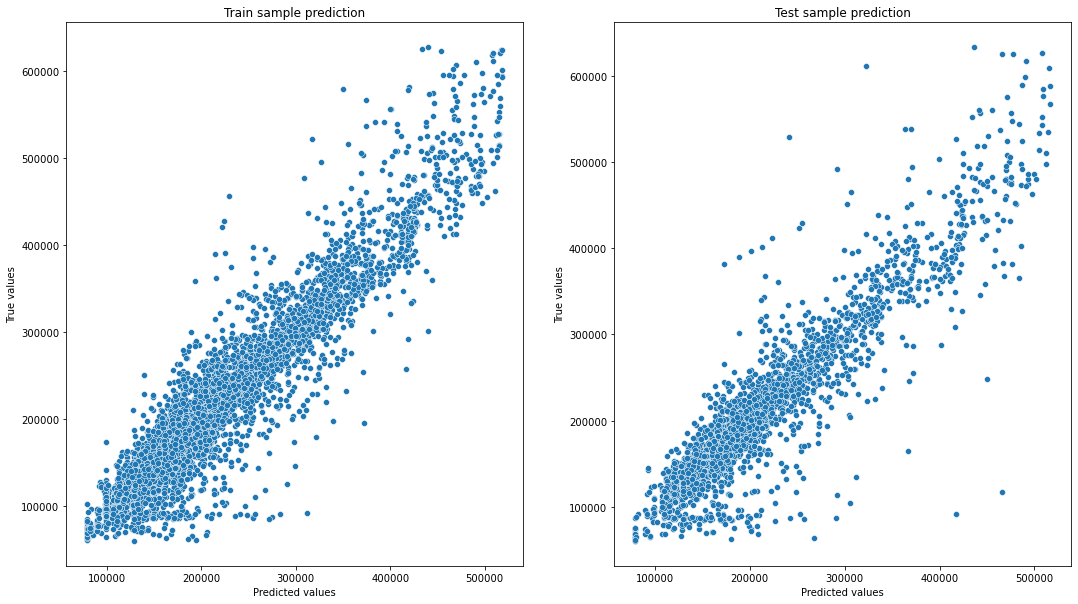

In [639]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [640]:
cv_score = cross_val_score(
    rf_model,
    X.fillna(-9999),
    y, scoring='r2',
    cv=KFold(n_splits=5, shuffle=True, random_state=21)
)
cv_score

array([0.87732597, 0.83454884, 0.86310036, 0.86319774, 0.8637563 ])

In [641]:
cv_score.mean(), cv_score.std()

(0.8603858413130098, 0.014008241523310863)

In [642]:
cv_score.mean() - cv_score.std(), cv_score.mean() + cv_score.std()

(0.846377599789699, 0.8743940828363206)

In [645]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
17,MedPriceByDistrict,6.916531e-01
18,MedSquarePriceByDistrict,1.574578e-01
1,Square,1.151947e-01
3,KitchenSquare,2.139746e-02
5,HouseFloor,3.184793e-03
2,LifeSquare,2.696732e-03
10,Social_1,2.009048e-03
11,Social_2,1.930675e-03
13,Healthcare_1,1.464184e-03
6,HouseYear,1.194671e-03


## Формирование файла с прогнозами

In [644]:
test_id = test_df["Id"]
pred_df = pd.DataFrame()
pred_df["Id"] = test_id
pred_df["Price"] = np.random.randint(0, 1e6, size=test_id.shape[0])
assert pred_df.shape[0] == 5000, f"Real pred-shape = {pred_df.shape[0]}, Expected pred-shape = 5000"

pred_df.to_csv("./predictions_.csv", index=False)

In [643]:
pred_df = pd.read_csv("./predictions_.csv")
pred_df.head(n=2)

,Id,Price
0,4567,638388
1,5925,586750


In [646]:
test_df.shape[0]

5000